## author: Levon Abramian, J4132
## Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

### Goal: The use of stochastic and metaheuristic algorithms (Simulated Annealing, Differential Evolution, Particle Swarm Optimization) in the tasks of unconstrained nonlinear optimization and the experimental comparison of them with Nelder-Mead and Levenberg-Marquardt algorithms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from pyswarm import pso
from scipy.optimize import minimize, least_squares, differential_evolution, dual_annealing

In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
import warnings
warnings.filterwarnings("ignore")

Limits: $a$, $b$, $c$ and $d$ is in an interval [-2; 2]

In [4]:
EPS = 0.001
N_ELEMS = 1001
MAX_NITER = 1000

In [5]:
def func(x):
    return 1./(x**2 - 3*x + 2)

In [6]:
def get_y(x, delta):
    f = func(x)
    f = np.where(f < -100, -100 + delta, f)
    f = np.where((100 > f) & (f > -100), f + delta, f)
    f = np.where(f > 100,  100 + delta, f)
    return f

In [7]:
def rational_approximation(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

In [8]:
def loss(params, x, y):
    a, b, c, d = params
    predictions = rational_approximation(x, a, b, c, d)
    return np.sum((predictions - y) ** 2)

In [9]:
def neldermead_method(x, y, initial_params):
    result = minimize(loss, initial_params, args=(x, y), method='Nelder-Mead', options={"maxiter": MAX_NITER, 'return_all':True})
    return result

def levenberg_marquardt(x, y, initial_params):
    def residuals(params):
        return rational_approximation(x, *params) - y
    
    result = least_squares(residuals, initial_params, method='lm', verbose=1)
    
    return result

In [10]:
def annual_method(x, y, initial_params):
    bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
    result = dual_annealing(loss, bounds, args=(x, y), maxiter=MAX_NITER)
    return result

def differential_evolution_method(x, y, initial_params):
    bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
    result = differential_evolution(loss, bounds, args=(x, y), maxiter=MAX_NITER)
    return result

def swarm_method(x, y, initial_params):
    pso_bounds = [(-10, 10)] * 4  # Four parameters to optimize
    pso_result, pso_best_cost = pso(loss, lb=(-10, -10, -10, -10), ub=(10, 10, 10, 10), args=(x, y), maxiter=MAX_NITER)
    # bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]
    # result = differential_evolution(loss, bounds, args=(x, y), maxiter=MAX_NITER)
    return pso_result, pso_best_cost

In [11]:
x_list = np.linspace(0, 3, N_ELEMS)
delta = np.random.normal(size=N_ELEMS)
y_list = get_y(x_list, delta)

Just checking the data with noise using a graph

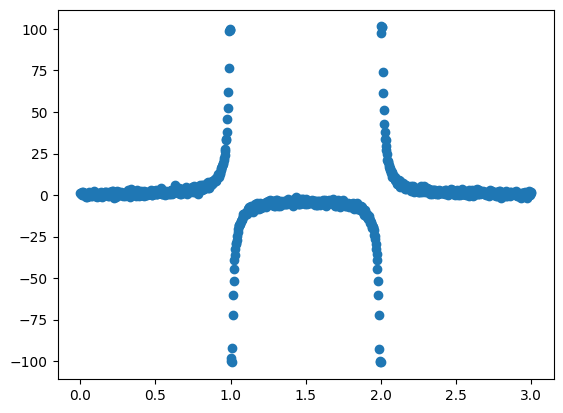

In [12]:
plt.scatter(x_list, y_list)

In [13]:
initial_params = [0.1, 0.1, 0.1, 0.1]
neldermead_params = neldermead_method(x_list, y_list, initial_params)
lm_params = levenberg_marquardt(x_list, y_list, initial_params)
de_params = differential_evolution_method(x_list, y_list, initial_params)
annual_params = annual_method(x_list, y_list, initial_params)
swarm_params = swarm_method(x_list, y_list, initial_params)

`xtol` termination condition is satisfied.
Function evaluations 157, initial cost 1.3424e+05, final cost 6.8297e+04, first-order optimality 9.11e+07.
Stopping search: Swarm best position change less than 1e-08


Text(0.5, 1.0, 'Approximation Nelder-Mead')

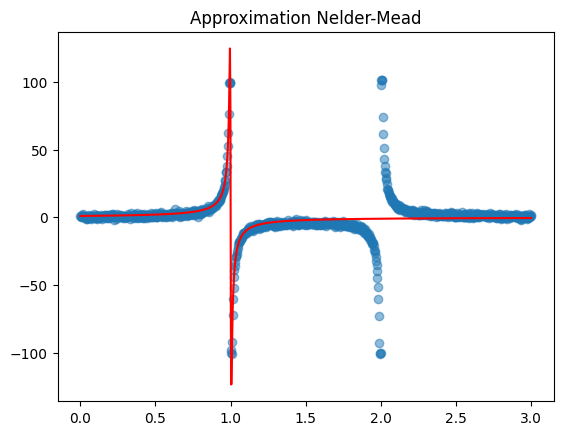

In [14]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *neldermead_params.x), color='red', label='Nelder-Mead')
plt.title('Approximation Nelder-Mead')

Text(0.5, 1.0, 'Approximation Levenberg-Marquardt')

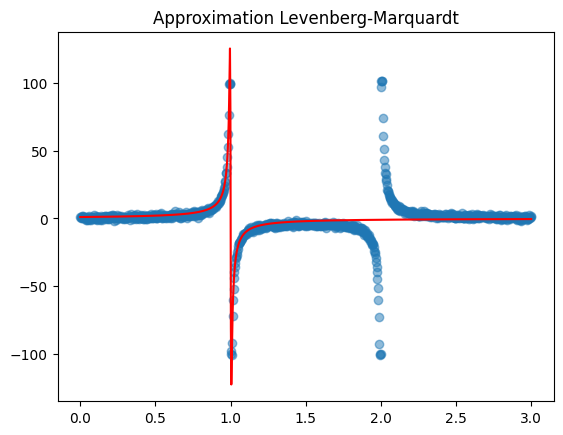

In [15]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *lm_params.x), color='red', label='Levenberg Marquardt')
plt.title('Approximation Levenberg-Marquardt')

Text(0.5, 1.0, 'Approximation Differential Evolution')

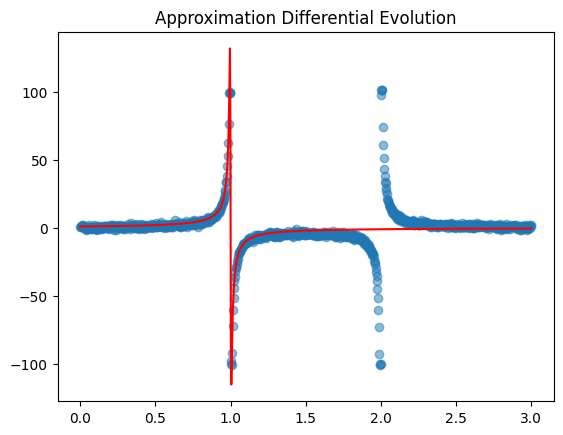

In [16]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *de_params.x), color='red', label='Differential Evolution')
plt.title('Approximation Differential Evolution')

Text(0.5, 1.0, 'Approximation Annual Method')

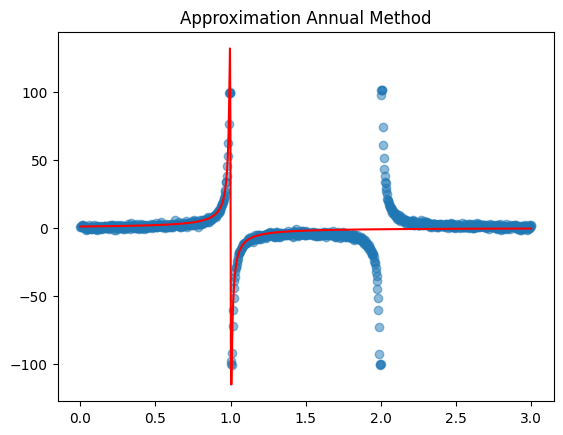

In [17]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *annual_params.x), color='red', label='Annual Method')
plt.title('Approximation Annual Method')

Text(0.5, 1.0, 'Swarm Method')

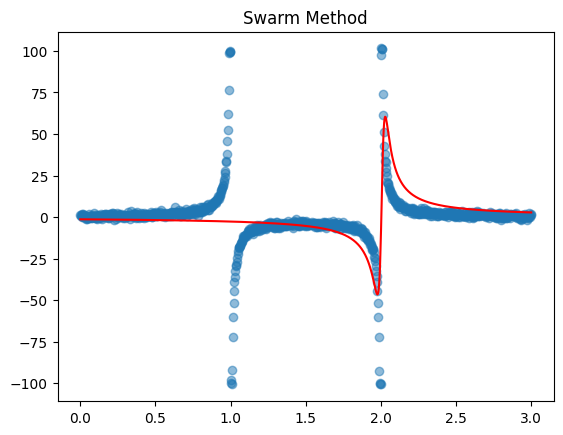

In [18]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *swarm_params[0]), color='red', label='Swarm Method')
plt.title('Swarm Method')

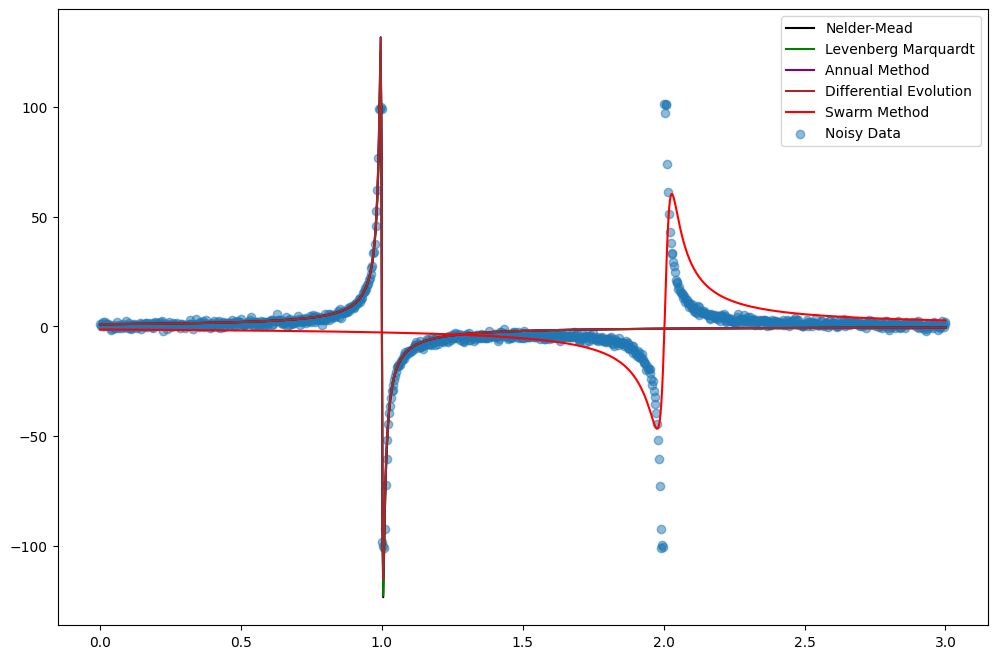

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(x_list, rational_approximation(x_list, *neldermead_params.x), label='Nelder-Mead', color='black')
plt.plot(x_list, rational_approximation(x_list, *lm_params.x), label='Levenberg Marquardt', color='green')
plt.plot(x_list, rational_approximation(x_list, *annual_params.x), color='purple', label='Annual Method')
plt.plot(x_list, rational_approximation(x_list, *de_params.x), label='Differential Evolution', color='brown')
plt.plot(x_list, rational_approximation(x_list, *swarm_params[0]), color='red', label='Swarm Method')
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.legend()

It can be seen that there is no fundamental difference between the methods. Perhaps, judging by the graph, the Particle Swarm Optimization works a little worse.

Text(0.5, 1.0, 'Value at minimum point')

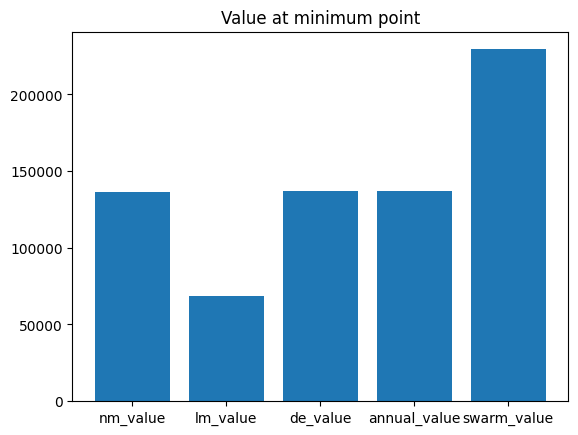

In [20]:
d = {
    'nm_value': neldermead_params.fun,
    'lm_value': lm_params.cost,
    'de_value': de_params.fun,
    'annual_value': annual_params.fun,
    'swarm_value': swarm_params[1],
}

plt.bar(d.keys(), d.values())
plt.title('Value at minimum point')

Text(0.5, 1.0, 'Function Evaluation Number')

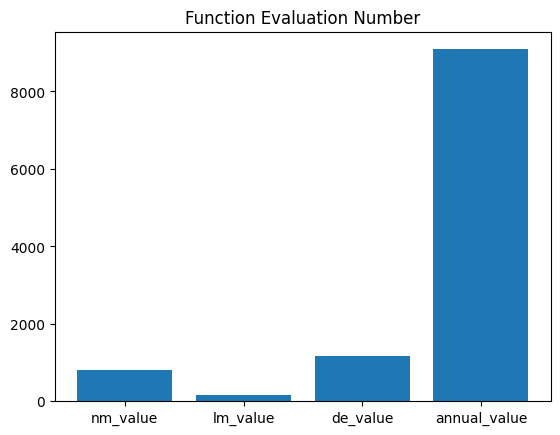

In [21]:
d = {
    'nm_value': neldermead_params.nfev,
    'lm_value': lm_params.nfev,
    'de_value': de_params.nfev,
    'annual_value': annual_params.nfev,
}

plt.bar(d.keys(), d.values())
plt.title('Function Evaluation Number')

Generally, it can be seen that methods using gradient works better because the loss function is a convex and quite similar. Genetic methods usually better in cases when the loss function is more complicated.

It will be interesting to change the starting point and explore how the effectiveness of the optimization methods changes.

In [22]:
# initial_params = [0.1, 0.1, 0.1, 0.1] --> was
initial_params = [-0.1, -0.1, -0.1, -0.1]
neldermead_params_2 = neldermead_method(x_list, y_list, initial_params)
lm_params_2 = levenberg_marquardt(x_list, y_list, initial_params)
de_params_2 = differential_evolution_method(x_list, y_list, initial_params)
annual_params_2 = annual_method(x_list, y_list, initial_params)
swarm_params_2 = swarm_method(x_list, y_list, initial_params)

`ftol` termination condition is satisfied.
Function evaluations 199, initial cost 1.6318e+05, final cost 1.3419e+05, first-order optimality 3.27e-02.
Stopping search: Swarm best position change less than 1e-08


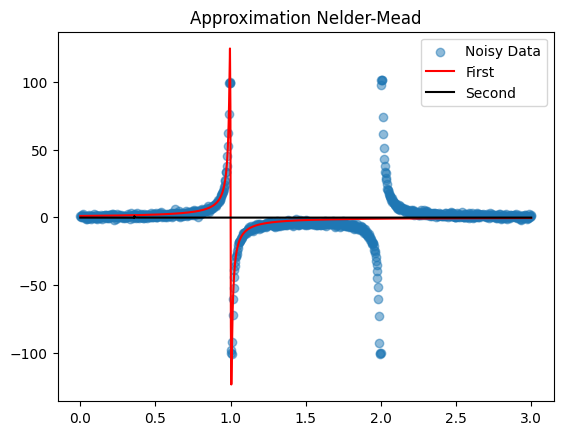

In [23]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *neldermead_params.x), color='red', label='First')
plt.plot(x_list, rational_approximation(x_list, *neldermead_params_2.x), color='black', label='Second')
plt.title('Approximation Nelder-Mead')
plt.legend()

Totally another approximation. Below it will be shown difference: function evaluations and function value at minimum point

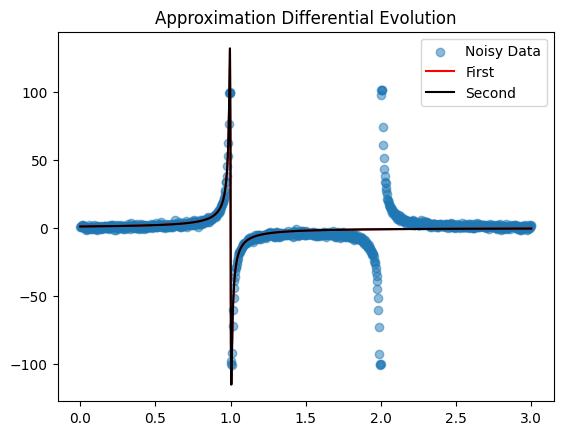

In [24]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *de_params.x), color='red', label='First')
plt.plot(x_list, rational_approximation(x_list, *de_params_2.x), color='black', label='Second')
plt.title('Approximation Differential Evolution')
plt.legend()

The same result

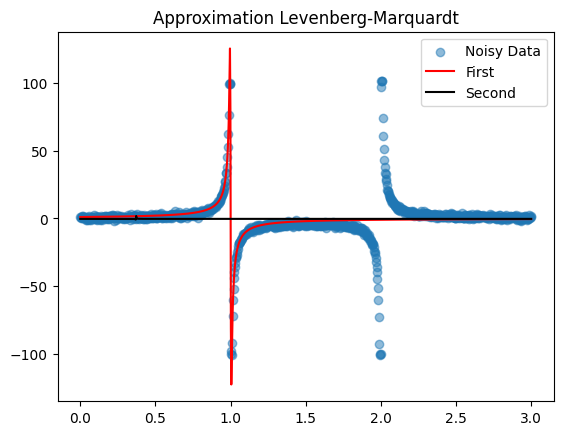

In [25]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *lm_params.x), color='red', label='First')
plt.plot(x_list, rational_approximation(x_list, *lm_params_2.x), color='black', label='Second')
plt.title('Approximation Levenberg-Marquardt')
plt.legend()

Totally another approximation like for Nelder-Mead algorithm.

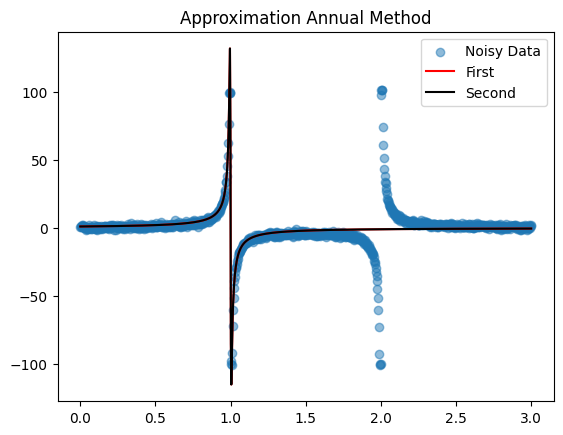

In [26]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *annual_params.x), color='red', label='First')
plt.plot(x_list, rational_approximation(x_list, *annual_params.x), color='black', label='Second')
plt.title('Approximation Annual Method')
plt.legend()

The same result

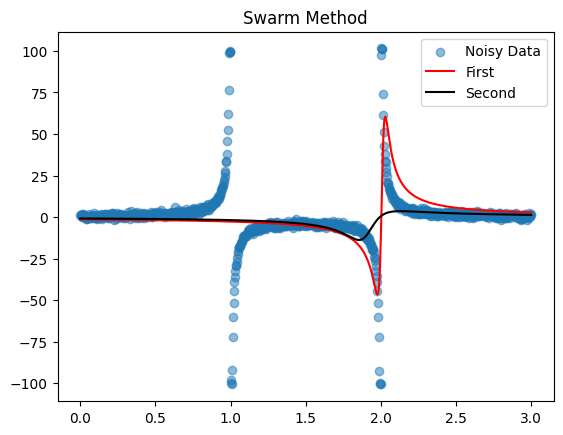

In [27]:
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.plot(x_list, rational_approximation(x_list, *swarm_params[0]), color='red', label='First')
plt.plot(x_list, rational_approximation(x_list, *swarm_params_2[0]), color='black', label='Second')
plt.title('Swarm Method')
plt.legend()

Another result, the red line seems fits the data better

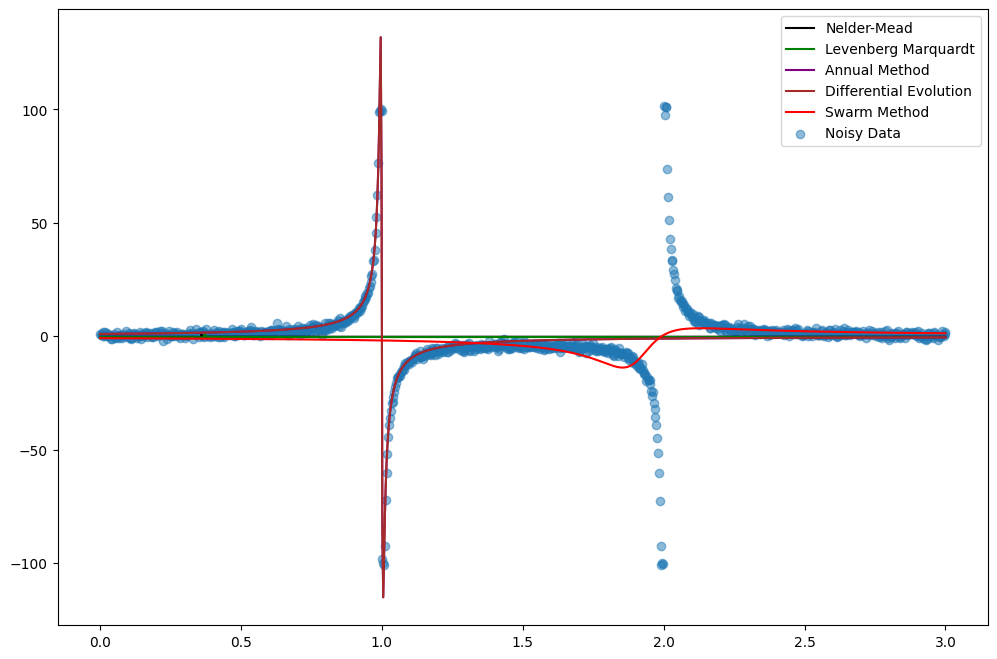

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(x_list, rational_approximation(x_list, *neldermead_params_2.x), label='Nelder-Mead', color='black')
plt.plot(x_list, rational_approximation(x_list, *lm_params_2.x), label='Levenberg Marquardt', color='green')
plt.plot(x_list, rational_approximation(x_list, *annual_params_2.x), color='purple', label='Annual Method')
plt.plot(x_list, rational_approximation(x_list, *de_params_2.x), label='Differential Evolution', color='brown')
plt.plot(x_list, rational_approximation(x_list, *swarm_params_2[0]), color='red', label='Swarm Method')
plt.scatter(x_list, y_list, label='Noisy Data', alpha=0.5)
plt.legend()

Text(0.5, 1.0, 'Value at minimum point')

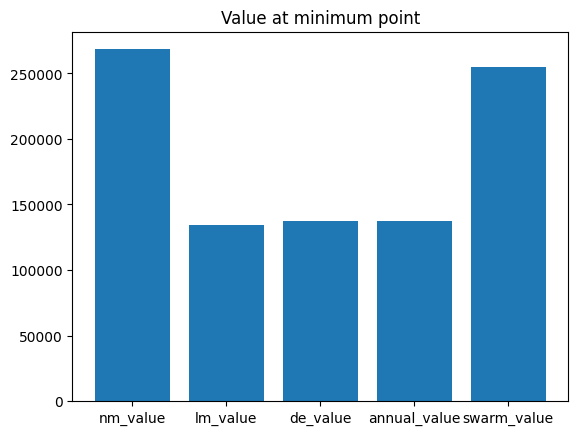

In [29]:
d = {
    'nm_value': neldermead_params_2.fun,
    'lm_value': lm_params_2.cost,
    'de_value': de_params_2.fun,
    'annual_value': annual_params_2.fun,
    'swarm_value': swarm_params_2[1],
}

plt.bar(d.keys(), d.values())
plt.title('Value at minimum point')

Text(0.5, 1.0, 'Function Evaluation Number')

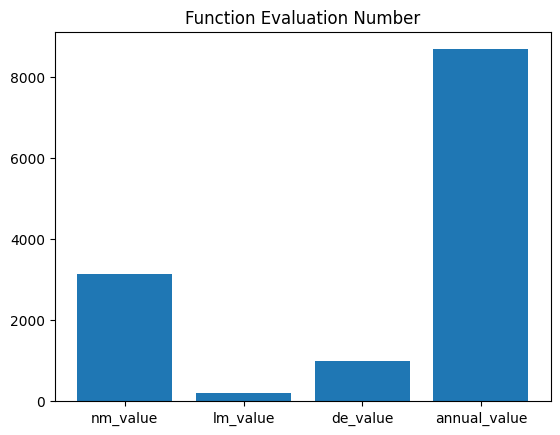

In [30]:
d = {
    'nm_value': neldermead_params_2.nfev,
    'lm_value': lm_params_2.nfev,
    'de_value': de_params_2.nfev,
    'annual_value': annual_params_2.nfev,
}

plt.bar(d.keys(), d.values())
plt.title('Function Evaluation Number')

Now the Simulated Annealing algorithms works no worse in terms of finding the minimum point. But genetic algorithms still do a lot of calculations of function values.

## PART 2

In [59]:
# Define cities and their coordinates (latitude, longitude)

cities = {
    'New York': (40.7128, -74.0060),
    'Chicago': (41.8781, -87.6298),
    'Los Angeles': (34.0522, -118.2437),
    'Moscow': (55.774, 37.514),
    'Miami': (25.7617, -80.1918),
    'Toronto': (43.6510, -79.347015),
    'Montreal': (45.5017, -73.5673),
    'London': (51.5074, -0.1278),
    'Paris': (48.8566, 2.3522),
    'Berlin': (52.5200, 13.4050),
    'Beijing': (39.910, 116.590),
    'Madrid': (40.4168, -3.7038),
    'Rome': (41.9028, 12.4964),
    'Lisbon': (38.7223, -9.1393),
    'Tokyo': (35.6762, 139.6503),
}

In [70]:
# Calculate the distance matrix using Haversine formula and eucledian distance 

def haversine_dist(coord1, coord2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    
    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    # distance = np.sqrt((lat1 - lat2)**2 + (lon2 - lon1)**2)
    return distance

def eucledian_dist(coord1, coord2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    
    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    distance = np.sqrt((lat1 - lat2)**2 + (lon2 - lon1)**2)
    return distance



def calculate_distance_matrix_h(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    city_names = list(cities.keys())

    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i][j] = haversine_dist(cities[city_names[i]], cities[city_names[j]])

    return distance_matrix

def calculate_distance_matrix_e(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    city_names = list(cities.keys())

    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i][j] = eucledian_dist(cities[city_names[i]], cities[city_names[j]])

    return distance_matrix

In [71]:
# Simulated Annealing Algorithm
def simulated_annealing(distance_matrix, initial_temp=10000, cooling_rate=0.995, stopping_temp=1):
    num_cities = len(distance_matrix)
    current_solution = list(range(num_cities))
    random.shuffle(current_solution)

    current_distance = total_distance(current_solution, distance_matrix)
    best_solution = current_solution[:]
    best_distance = current_distance

    iteration_results = []  # Store iteration results

    temperature = initial_temp
    while temperature > stopping_temp:
        new_solution = current_solution[:]
        i, j = random.sample(range(num_cities), 2)  # Swap two cities
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        new_distance = total_distance(new_solution, distance_matrix)

        if new_distance < current_distance or random.uniform(0, 1) < np.exp((current_distance - new_distance) / temperature):
            current_solution = new_solution

            current_distance = new_distance

            if new_distance < best_distance:
                best_solution = new_solution[:]
                best_distance = new_distance

        iteration_results.append(current_solution[:])  # Track current solution

        temperature *= cooling_rate

    return best_solution, best_distance, iteration_results


def total_distance(order, distance_matrix):
    return sum(distance_matrix[order[i], order[(i + 1) % len(order)]] for i in range(len(order)))

In [72]:
def plot_cities(cities, solution, title):
    coordinates = np.array(list(cities.values()))
    path = np.concatenate([coordinates[solution], [coordinates[solution[0]]]])  # Loop back to start

    plt.figure(figsize=(10, 8))
    plt.plot(path[:, 1], path[:, 0], marker='o', color='blue', linestyle='-')
    plt.scatter(coordinates[:, 1], coordinates[:, 0], color='red')

    for i, city in enumerate(cities.keys()):
        plt.annotate(city, (coordinates[i][1], coordinates[i][0]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

In [73]:
distance_matrix_h = calculate_distance_matrix_h(cities)
distance_matrix_e = calculate_distance_matrix_e(cities)

In [74]:
best_solution_h, best_distance_h, iteration_results_h = simulated_annealing(distance_matrix_h)
best_solution_e, best_distance_e, iteration_results_e = simulated_annealing(distance_matrix_e)

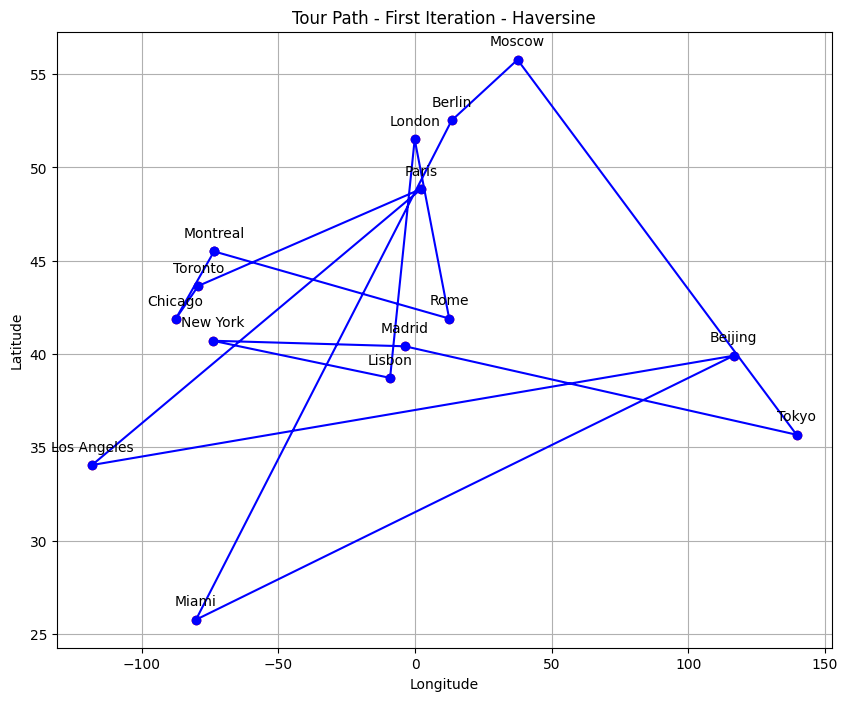

In [75]:
# Plot the first iteration
plot_cities(cities, iteration_results_h[0], 'Tour Path - First Iteration - Haversine')

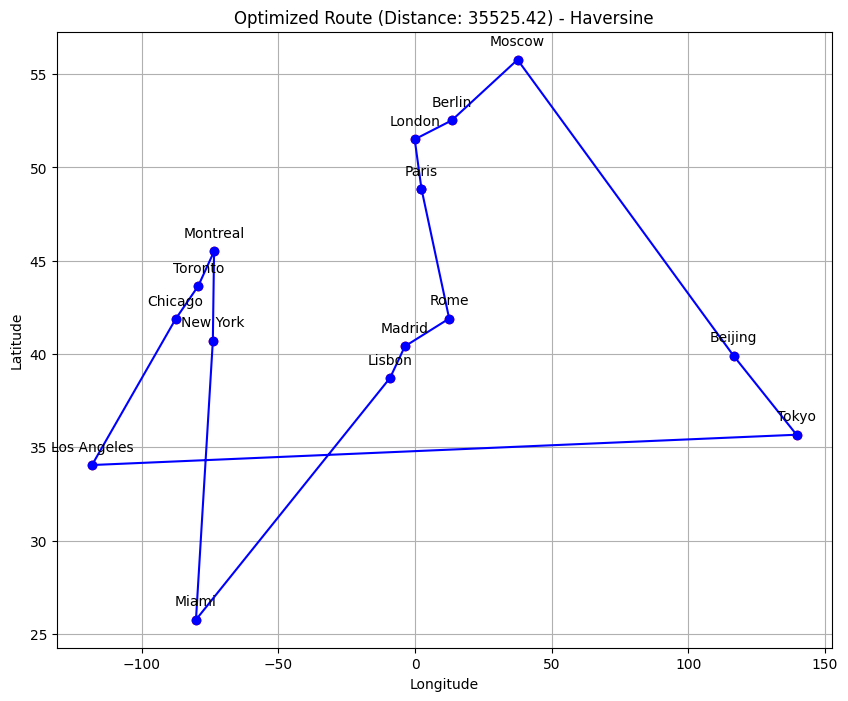

In [76]:
# Plot the optimized route
plot_cities(cities, best_solution_h, f'Optimized Route (Distance: {best_distance_h:.2f}) - Haversine')

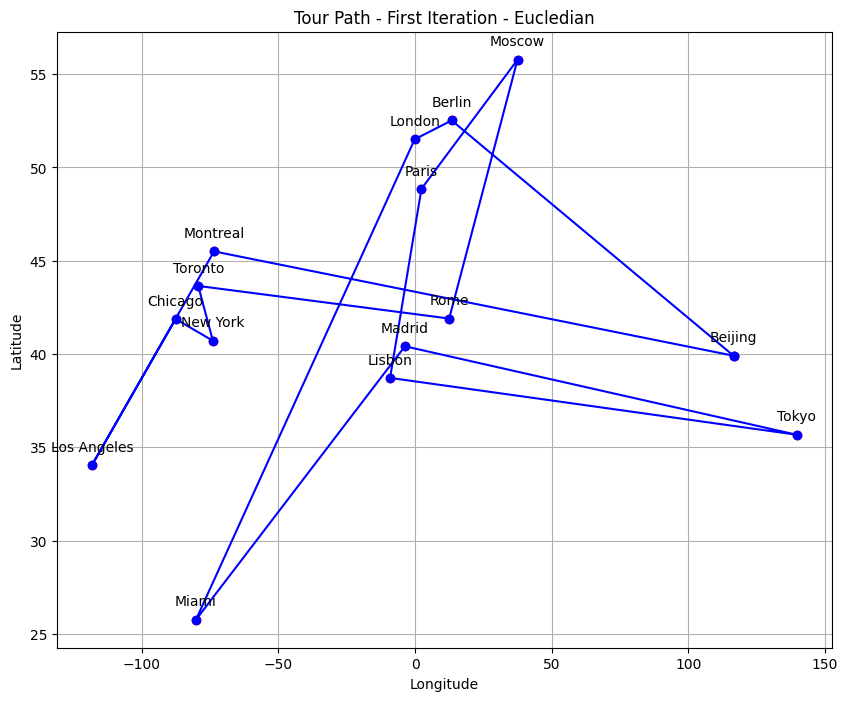

In [77]:
# Plot the first iteration
plot_cities(cities, iteration_results_e[0], 'Tour Path - First Iteration - Eucledian')

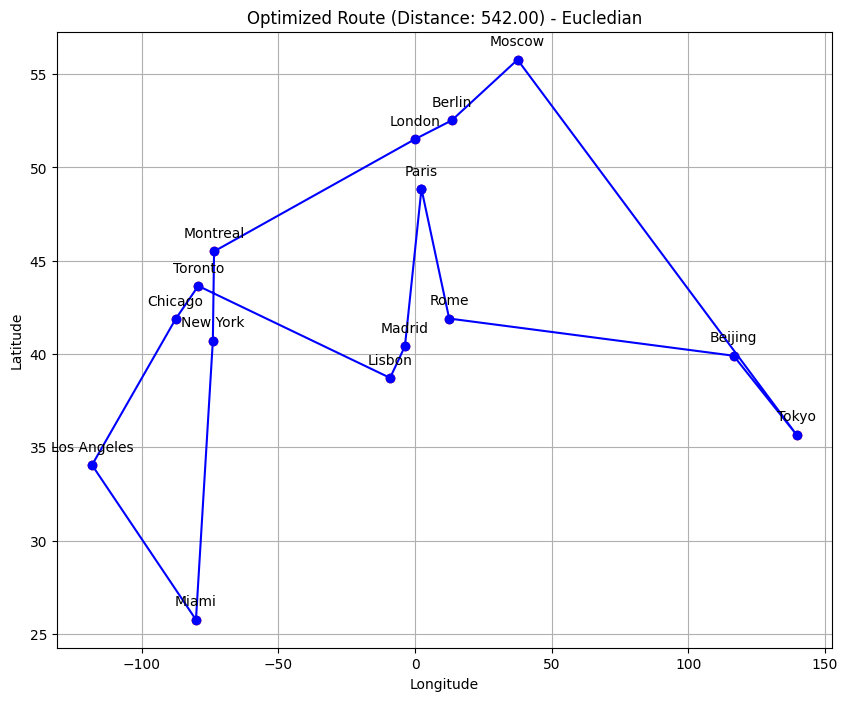

In [78]:
# Plot the optimized route
plot_cities(cities, best_solution_e, f'Optimized Route (Distance: {best_distance_e:.2f}) - Eucledian')

The alrorithm almost find the best path in the both way.

# Conclusion

The genetic algprithms works well, especially with complexity data or loss function. If loss function loss is simple or convex it could be better (usually) to use iterations alrorithms. The results of genetics algorithm can be cruashily changed if the initial point will be another. The initial point should be chosen carefully. Travelling Salesman Problem is solved good with genectic algorithms.